In [4]:
import numpy as np
import pandas as pd
loc = '/Users/ecuerbo/python/pyprac/data/nsfg.hdf5'
nsfg = pd.read_hdf(loc,'nsfg')
type(nsfg)

pandas.core.frame.DataFrame

In [22]:
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6390 non-null   float64
 3   birthwgt_oz1  6355 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [43]:
nsfg.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,birth_wt,preg_length
count,9358.000000,9358.000000,6390.000000,6355.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000,6355.000000,9109.000000
mean,65502.392605,1.773990,6.703286,6.694099,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147,7.120978,55.206938
std,2953.471315,1.348648,1.429265,4.533847,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222,1.422236,27.147948
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000,0.000000,0.000000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407,6.375000,25.000000
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158,7.187500,67.000000
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982,8.000000,75.000000
max,70619.000000,6.000000,17.000000,15.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000,17.937500,92.000000


In [23]:
#replace 98,99 values on the weight as NAN
nsfg['birthwgt_lb1'].replace([98,99], np.nan, inplace=True)
nsfg['birthwgt_oz1'].replace([98,99], np.nan, inplace=True)
nsfg['birth_wt'] = nsfg['birthwgt_lb1'] + nsfg['birthwgt_oz1']/16

In [33]:
nsfg['preg_length'] = nsfg.agepreg-nsfg.agecon

In [16]:
nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

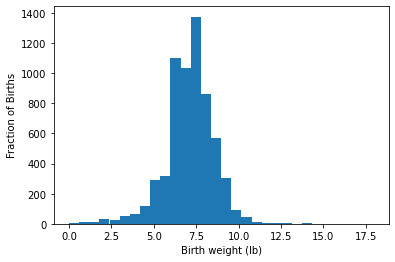

In [32]:
import matplotlib.pyplot as plt
plt.hist(nsfg.birth_wt.dropna(),bins=30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of Births');

In [38]:
preterm = nsfg['prglngth']<37
preterm_weight= nsfg['birth_wt'][preterm]
fullterm_weight = nsfg['birth_wt'][~preterm]

In [40]:
print(preterm_weight.mean(),fullterm_weight.mean())

5.577598314606742 7.372323879231473


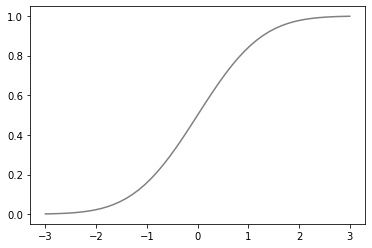

In [41]:
from scipy.stats import norm
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)
plt.plot(xs,ys, color='gray');

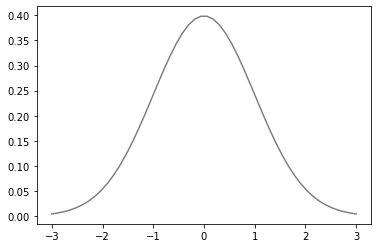

In [42]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys, color='gray');

In [ ]:
import seaborn as sns
sns.kdeplot(sample);

In [44]:
bw = nsfg['birth_wt']

mean = bw.mean()
std = bw.std()
print(mean, std)

from scipy.stats import norm
dist = norm(mean,std)

7.120977576711251 1.4222360990399774


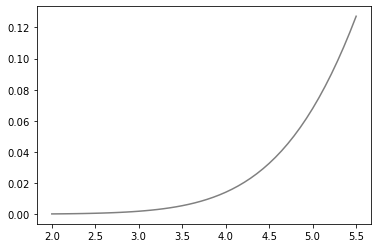

In [48]:
xs = np.linspace(2,5.5)
ys = dist.cdf(xs)
plt.clf()
plt.plot(xs,ys, color='gray');

In [ ]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02);

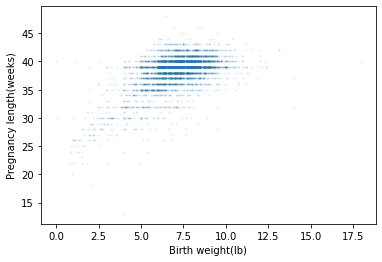

In [64]:
plt.scatter(nsfg['birth_wt'], nsfg['prglngth'], s=1,alpha=0.1)
plt.xlabel('Birth weight(lb)')
plt.ylabel('Pregnancy length(weeks)');

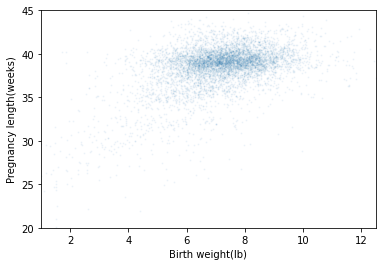

In [65]:
bw_jitter = nsfg['birth_wt'] + np.random.normal(0,0.5,size= len(nsfg))
prg_jitter = nsfg['prglngth'] + np.random.normal(0,0.5,size= len(nsfg))
plt.scatter(bw_jitter, prg_jitter, s=1,alpha=0.051)
plt.axis([1,12.5,20,45])
plt.xlabel('Birth weight(lb)')
plt.ylabel('Pregnancy length(weeks)');

In [ ]:
data = brfss.dropna(subset=['AGE','WTKG3'])
sns.violinplot(x='AGE', y='WTKG3',data=data,inner=None);

In [ ]:
sns.violinplot(x='AGE', y='WTKG3',data=data,whis=10);

In [ ]:
columns = ['HTM4','WTKG3','AGE']
subset = brfss[columns]
subset.corr()

In [70]:
xs = np.linspace(-1,1)
ys = xs**2
ys += np.random.normal(0,0.05,len(xs))
np.corrcoef(xs,ys)

array([[1.      , 0.002124],
       [0.002124, 1.      ]])

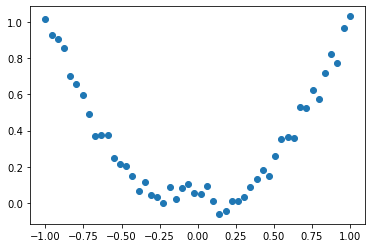

In [74]:
plt.plot(xs,ys,'o');

In [ ]:
from scipy.stats import linregress
res = linregress(xs, ys)

#regression line
fx = np.array([xs.min(), xs.max()])
fy = ress.intercept + res.slope* fx
plt.plot(fx,fy,'-');

In [ ]:
#multiple regression
import statsmodels.formula.api as smf
results = smf.ols('INCOME2 ~ _VEGESU1',data=brfss).fit()
results.params

results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

In [ ]:
#adding a quadratic term
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

In [ ]:
#generating predictions
df = pd.DataFrame()
df['age'] =np.linspace(18,85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)

In [ ]:
#plot predictions
plt.plot(df['age'], pred12,label='High School')
plt.plot(mean_income_by_age,'o',alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend();

In [ ]:
#sex and income
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

In [ ]:
#boolean variable
gss['gunlaw'].value_counts()
gss['gunlaw'].replace([2],[0], inplace=True)

formula = 'gunlaw ~ educ + educ2 + age + age2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

df = pd.DataFrame()
df['age'] =np.linspace(18,89)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age,'o',alpha=0.5)
plt.plot(df['age'], pred1,label='Male')
plt.plot(df['age'], pred2,label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()

In [ ]:
#Pmf, Cdf from empiricaldist library